In [2]:
import pandas as pd
df = pd.read_csv("data/speech_output.csv")

/var/folders/27/ks4jxwf13hn5277w8lg01sfw0000gn/T/ipykernel_54847/4198281782.py:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/speech_output.csv")


In [10]:
df.to_parquet("data/speech_output.parquet")

In [14]:
df.iloc[2]['text']

'Madam President, honourable Members, for all of us, upholding integrity and independence within all European institutions is crucial for maintaining public trust and impartial decision-making. Based on extensive work and contacts with the other institutions, the Commission tabled in June 2023 a proposal for a joint agreement between the institutions to establish an interinstitutional ethics body. To be truly interinstitutional, this body is common and open to all institutions and both advisory bodies mentioned in Article 13 of the Treaty on European Union. The Commission believes that the interinstitutional body will ensure that we have a clear and high standards of integrity and independence for the members of all European institutions, that we all have appropriate compliance mechanisms in all institutions, and that differences between the institutions and the institutional balance established by the founding treaties is respected. Areas where these standards are needed referred to s

In [18]:
len(set(df['agenda']))

16922

In [26]:
pd.to_datetime(df['date'])

0        2024-04-25
1        2024-04-25
2        2024-04-25
3        2024-04-25
4        2024-04-25
            ...    
574114   1999-07-20
574115   1999-07-20
574116   1999-07-20
574117   1999-07-20
574118   1999-07-20
Name: date, Length: 574119, dtype: datetime64[ns]

In [ ]:
len(df[~df['translatedText'].isna()]) / len(df) * 100

88.82862263746715

In [30]:
not_translated = df[df['translatedText'].isna()]
translated = df[~df['translatedText'].isna()]

In [33]:
pd.to_datetime(not_translated['date']).min(), pd.to_datetime(not_translated['date']).max()

(Timestamp('2019-07-02 00:00:00'), Timestamp('2024-04-25 00:00:00'))

In [34]:
pd.to_datetime(translated['date']).min(), pd.to_datetime(translated['date']).max()

(Timestamp('1999-07-20 00:00:00'), Timestamp('2019-04-18 00:00:00'))

In [41]:
len(set(df[df['agenda'].str.contains("migration|asylum")]['agenda']))

95

In [42]:
len(df[df['agenda'].str.contains("migration|asylum")]['text'])

4306

In [47]:
pd.to_datetime(df[df['agenda'].str.contains("migration|asylum")]['date']).min()

Timestamp('2001-10-02 00:00:00')

<Axes: ylabel='Frequency'>

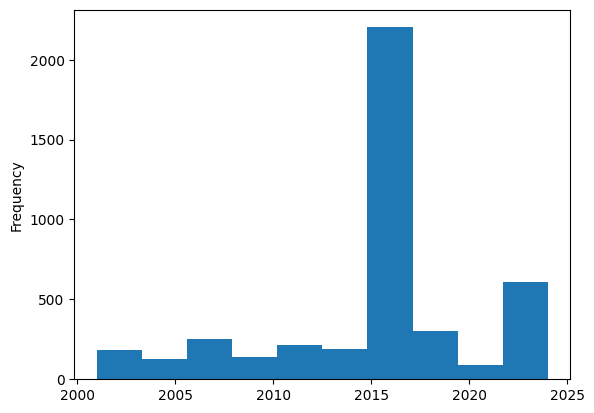

In [53]:
pd.to_datetime(df[df['agenda'].str.contains("migration|asylum")]['date']).dt.year.plot.hist()

In [55]:
df[df['agenda'].str.contains("migration|asylum")][['date', 'agenda']].drop_duplicates()

,date,agenda
1228,2024-04-10,17. Screening of third country nationals at th...
1473,2024-04-10,28.2. Asylum and migration management (A9-0152...
10568,2023-10-04,3. Need for a speedy adoption of the asylum an...
12311,2023-09-12,4. EU-Tunisia Agreement - aspects related to e...
15977,2023-05-10,9.61. Council of Europe Convention on preventi...
...,...,...
537155,2002-09-23,5. Common asylum procedure and internal security
540678,2002-05-14,9. Progress and perspectives in immigration an...
540978,2002-04-25,2. Reception of applicants for asylum in Membe...
541939,2002-04-08,"8. Immigration, frontiers, asylum, visas"


<Axes: ylabel='Frequency'>

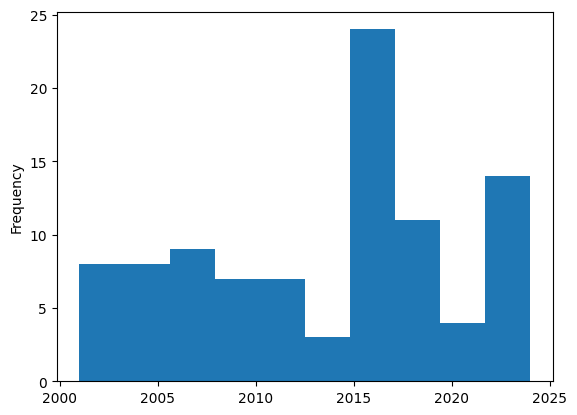

In [56]:
pd.to_datetime(df[df['agenda'].str.contains("migration|asylum")][['date', 'agenda']].drop_duplicates()['date']).dt.year.plot.hist()

In [57]:
df.columns

Index(['speaker', 'text', 'party', 'date', 'agenda', 'speechnumber',
       'procedure_ID', 'partyfacts_ID', 'period', 'chair', 'MEP', 'commission',
       'written', 'multispeaker', 'link', 'translationInSpeech',
       'translatedText'],
      dtype='object')

In [58]:
df.head()

,speaker,text,party,date,agenda,speechnumber,procedure_ID,partyfacts_ID,period,chair,MEP,commission,written,multispeaker,link,translationInSpeech,translatedText
0,President,I wish you an excellent good morning on this l...,-,2024-04-25,2. Interinstitutional Body for Ethical Standar...,1,,NaN,9,True,False,False,False,False,https://www.europarl.europa.eu/doceo/document/...,NaN,NaN
1,Daniel Freund,"Frau Präsidentin, liebe Kolleginnen und Kolleg...",Greens/EFA,2024-04-25,2. Interinstitutional Body for Ethical Standar...,2,,6403.0,9,False,True,False,False,False,https://www.europarl.europa.eu/doceo/document/...,NaN,NaN
2,Virginijus Sinkevičius,"Madam President, honourable Members, for all o...",-,2024-04-25,2. Interinstitutional Body for Ethical Standar...,3,,NaN,9,False,False,True,False,False,https://www.europarl.europa.eu/doceo/document/...,NaN,NaN
3,Sven Simon,"Madam President, colleagues, this last day of ...",PPE,2024-04-25,2. Interinstitutional Body for Ethical Standar...,4,,6398.0,9,False,True,False,False,False,https://www.europarl.europa.eu/doceo/document/...,NaN,NaN
4,Gabriele Bischoff,"Frau Präsidentin, werte Kommission, Kolleginne...",S&D,2024-04-25,2. Interinstitutional Body for Ethical Standar...,5,,6399.0,9,False,True,False,False,False,https://www.europarl.europa.eu/doceo/document/...,NaN,NaN


In [75]:
import requests
mep_data = {}
for term in range(10):
    response = requests.get("https://data.europarl.europa.eu/api/v2/meps", 
                            params={"parliamentary-term": term, "format": "application/ld+json"})
    if response.status_code == 200:
        mep_data[term] = response.json()['data']
    else:
        print(f"Couldn't find data on LT: {term}")

In [78]:
mep_df = pd.DataFrame([{**mep, "period": term} for term, data in mep_data.items() for mep in data])

In [79]:
mep_df.head()

,id,type,identifier,label,familyName,sortLabel,period,givenName,officialFamilyName,officialGivenName
0,person/452,Person,452,ARDWICK,Ardwick,ARDWICK,0,NaN,NaN,NaN
1,person/454,Person,454,Barend Willem BIESHEUVEL,Biesheuvel,BIESHEUVEL,0,Barend Willem,NaN,NaN
2,person/261,Person,261,Aldo MASULLO,Masullo,MASULLO,0,Aldo,NaN,NaN
3,person/573,Person,573,Pierre BILLOTTE,Billotte,BILLOTTE,0,Pierre,NaN,NaN
4,person/286,Person,286,Siegfried MEISTER,Meister,MEISTER,0,Siegfried,NaN,NaN


In [88]:
mep_df.to_parquet("MEP_MINIMAL_DATA.parquet")

4885

In [107]:
metadata = []
identifiers = list(set(mep_df['identifier']))
batch_size = 128
idx = 0
while idx < len(identifiers):
    print(f"idx: {idx}")
    batch = identifiers[idx: idx + batch_size]
    response = requests.get(f"https://data.europarl.europa.eu/api/v2/meps/{','.join(batch)}", 
                                params={"format": "application/ld+json"})
    
    if response.status_code == 200:
        metadata.extend(response.json()['data'])
    else:
        print(f"An error occured: {response.status_code}")

    idx += batch_size

idx: 0
idx: 128
idx: 256
idx: 384
idx: 512
idx: 640
idx: 768
idx: 896
idx: 1024
idx: 1152
idx: 1280
idx: 1408
idx: 1536
idx: 1664
idx: 1792
idx: 1920
idx: 2048
idx: 2176
idx: 2304
idx: 2432
idx: 2560
idx: 2688
idx: 2816
idx: 2944
idx: 3072
idx: 3200
idx: 3328
idx: 3456
idx: 3584
idx: 3712
idx: 3840
idx: 3968
idx: 4096
idx: 4224
idx: 4352
idx: 4480
idx: 4608
idx: 4736
idx: 4864


In [108]:
len(metadata)

4885

In [111]:
mep_metadata = pd.DataFrame(metadata)

In [114]:
mep_metadata.head()

,id,type,identifier,label,notation_codictPersonId,bday,hasGender,hasHonorificPrefix,hasMembership,citizenship,...,upperFamilyName,upperGivenName,deathDate,officialFamilyName,officialGivenName,upperOfficialFamilyName,upperOfficialGivenName,hasEmail,account,homepage
0,person/1008,Person,1008,Arnaldo FORLANI,1008,1925-12-08,http://publications.europa.eu/resource/authori...,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/1008-m-8666', 'type': 'Mem...",http://publications.europa.eu/resource/authori...,...,FORLANI,ARNALDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,person/1053,Person,1053,Leyla ONUR,1053,1945-01-08,http://publications.europa.eu/resource/authori...,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/1053-f-79079', 'type': 'Me...",http://publications.europa.eu/resource/authori...,...,ONUR,LEYLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,person/1055,Person,1055,Godelieve QUISTHOUDT-ROWOHL,1055,1947-06-18,http://publications.europa.eu/resource/authori...,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/1055-f-95196', 'type': 'Me...",http://publications.europa.eu/resource/authori...,...,QUISTHOUDT-ROWOHL,GODELIEVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,person/1091,Person,1091,Roberto SPECIALE,1091,1943-08-03,http://publications.europa.eu/resource/authori...,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/1091-f-81455', 'type': 'Me...",http://publications.europa.eu/resource/authori...,...,SPECIALE,ROBERTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,person/112071,Person,112071,Emer COSTELLO,112071,1962-09-03,http://publications.europa.eu/resource/authori...,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/112071-f-138094', 'type': ...",http://publications.europa.eu/resource/authori...,...,COSTELLO,EMER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
mep_metadata['gender'] = mep_metadata['hasGender'].apply(lambda gstr: gstr[len("http://publications.europa.eu/resource/authority/human-sex/"):])
mep_metadata = mep_metadata.drop('hasGender', axis='columns')
mep_metadata.head()

,id,type,identifier,label,notation_codictPersonId,bday,hasHonorificPrefix,hasMembership,citizenship,placeOfBirth,...,upperGivenName,deathDate,officialFamilyName,officialGivenName,upperOfficialFamilyName,upperOfficialGivenName,hasEmail,account,homepage,gender
0,person/1008,Person,1008,Arnaldo FORLANI,1008,1925-12-08,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/1008-m-8666', 'type': 'Mem...",http://publications.europa.eu/resource/authori...,Pesaro,...,ARNALDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE
1,person/1053,Person,1053,Leyla ONUR,1053,1945-01-08,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/1053-f-79079', 'type': 'Me...",http://publications.europa.eu/resource/authori...,Braunschweig,...,LEYLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE
2,person/1055,Person,1055,Godelieve QUISTHOUDT-ROWOHL,1055,1947-06-18,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/1055-f-95196', 'type': 'Me...",http://publications.europa.eu/resource/authori...,Etterbeek (Belgien),...,GODELIEVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE
3,person/1091,Person,1091,Roberto SPECIALE,1091,1943-08-03,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/1091-f-81455', 'type': 'Me...",http://publications.europa.eu/resource/authori...,Chiavari (Genova),...,ROBERTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE
4,person/112071,Person,112071,Emer COSTELLO,112071,1962-09-03,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/112071-f-138094', 'type': ...",http://publications.europa.eu/resource/authori...,Louth,...,EMER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE


In [123]:
mep_metadata['citizenship'] = mep_metadata['citizenship'].apply(lambda gstr: gstr[len("http://publications.europa.eu/resource/authority/country/"):])
mep_metadata.head()

,id,type,identifier,label,notation_codictPersonId,bday,hasHonorificPrefix,hasMembership,citizenship,placeOfBirth,...,upperGivenName,deathDate,officialFamilyName,officialGivenName,upperOfficialFamilyName,upperOfficialGivenName,hasEmail,account,homepage,gender
0,person/1008,Person,1008,Arnaldo FORLANI,1008,1925-12-08,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/1008-m-8666', 'type': 'Mem...",ITA,Pesaro,...,ARNALDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE
1,person/1053,Person,1053,Leyla ONUR,1053,1945-01-08,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/1053-f-79079', 'type': 'Me...",DEU,Braunschweig,...,LEYLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE
2,person/1055,Person,1055,Godelieve QUISTHOUDT-ROWOHL,1055,1947-06-18,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/1055-f-95196', 'type': 'Me...",DEU,Etterbeek (Belgien),...,GODELIEVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE
3,person/1091,Person,1091,Roberto SPECIALE,1091,1943-08-03,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/1091-f-81455', 'type': 'Me...",ITA,Chiavari (Genova),...,ROBERTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE
4,person/112071,Person,112071,Emer COSTELLO,112071,1962-09-03,http://publications.europa.eu/resource/authori...,"[{'id': 'membership/112071-f-138094', 'type': ...",IRL,Louth,...,EMER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE


In [129]:
mep_metadata['honorific_prefix'] =  mep_metadata['hasHonorificPrefix'].apply(lambda prefix: prefix[len("http://publications.europa.eu/resource/authority/honorific/"):] if isinstance(prefix, str) else prefix)
mep_metadata = mep_metadata.drop('hasHonorificPrefix', axis='columns')
mep_metadata.head()

,id,type,identifier,label,notation_codictPersonId,bday,hasMembership,citizenship,placeOfBirth,familyName,...,deathDate,officialFamilyName,officialGivenName,upperOfficialFamilyName,upperOfficialGivenName,hasEmail,account,homepage,gender,honorific_prefix
0,person/1008,Person,1008,Arnaldo FORLANI,1008,1925-12-08,"[{'id': 'membership/1008-m-8666', 'type': 'Mem...",ITA,Pesaro,Forlani,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MR
1,person/1053,Person,1053,Leyla ONUR,1053,1945-01-08,"[{'id': 'membership/1053-f-79079', 'type': 'Me...",DEU,Braunschweig,Onur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE,MS
2,person/1055,Person,1055,Godelieve QUISTHOUDT-ROWOHL,1055,1947-06-18,"[{'id': 'membership/1055-f-95196', 'type': 'Me...",DEU,Etterbeek (Belgien),Quisthoudt-Rowohl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE,MS
3,person/1091,Person,1091,Roberto SPECIALE,1091,1943-08-03,"[{'id': 'membership/1091-f-81455', 'type': 'Me...",ITA,Chiavari (Genova),Speciale,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MR
4,person/112071,Person,112071,Emer COSTELLO,112071,1962-09-03,"[{'id': 'membership/112071-f-138094', 'type': ...",IRL,Louth,Costello,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE,MS


In [214]:
def extract_national_political_group(memberships):
    national_parties = [{"id": membership.get('organization', '')[len("org/"):],
                         "startDate": membership['memberDuring'].get('startDate'),
                         "endDate": membership['memberDuring'].get('endDate')} for membership in memberships if
                         membership.get('membershipClassification', "") == 'def/ep-entities/NATIONAL_POLITICAL_GROUP']
    return national_parties

mep_metadata['national_parties'] = mep_metadata['hasMembership'].apply(extract_national_political_group)

In [233]:
max(mep_metadata['national_parties'].iloc[2], key=lambda dp: dp['startDate'])

{'id': '4008', 'startDate': '2014-07-01', 'endDate': '2019-07-01'}

In [ ]:
mep_metadata['latest_np_affiliation'] = mep_metadata['national_parties'].apply(lambda parties: max(parties, key=lambda dp: dp['startDate'])['id'])

0        625
1        741
2       4008
3        913
4       2760
        ... 
4880     812
4881     771
4882     627
4883    2691
4884    4047
Name: national_parties, Length: 4885, dtype: object

In [172]:
national_party_ids = set(mep_metadata['hasMembership'].apply(extract_national_political_group).explode().apply(lambda org: org['id']))

In [173]:
len(national_party_ids)

1660

In [174]:
national_parties = []
national_party_ids = list(national_party_ids)
batch_size = 128
idx = 0
while idx < len(identifiers):
    print(f"idx: {idx}")
    batch = identifiers[idx: idx + batch_size]
    response = requests.get(f"https://data.europarl.europa.eu/api/v2/corporate-bodies/{','.join(batch)}", 
                                params={"format": "application/ld+json"})
    
    if response.status_code == 200:
        national_parties.extend(response.json()['data'])
    else:
        print(f"An error occured: {response.status_code}")

    idx += batch_size

idx: 0
idx: 128
idx: 256
idx: 384
idx: 512
idx: 640
idx: 768
idx: 896
idx: 1024
idx: 1152
idx: 1280
idx: 1408
idx: 1536
idx: 1664
idx: 1792
idx: 1920
idx: 2048
idx: 2176
idx: 2304
idx: 2432
idx: 2560
idx: 2688
idx: 2816
idx: 2944
idx: 3072
idx: 3200
idx: 3328
idx: 3456
idx: 3584
idx: 3712
idx: 3840
idx: 3968
idx: 4096
idx: 4224
idx: 4352
idx: 4480
idx: 4608
idx: 4736
idx: 4864


In [180]:
parties_df = pd.DataFrame(national_parties)
parties_df.head()

,id,type,identifier,source,temporal,label,altLabel,notation_providerTemporalBodyId,notation_codictBodyId,prefLabel,classification,represents,isVersionOf,hasSubOrganization,linkedTo
0,org/1008,Organization,1008,EU_PARLIAMENT,"{'id': 'time-period/19990721-20020114', 'type'...",D14,"{'it': 'Giappone', 'ro': 'Japonia', 'pl': 'Jap...",1008,1008,{'ro': 'Delegația pentru relațiile cu Japonia'...,def/ep-entities/DELEGATION_PARLIAMENTARY,NaN,NaN,NaN,NaN
1,org/1053,Organization,1053,EU_PARLIAMENT,"{'id': 'time-period/19840724-19940718', 'type'...",SGP,"{'hu': 'SGP', 'fr': 'SGP', 'it': 'SGP', 'lv': ...",1053,1053,"{'es': 'Staatkundig Gereformeerde Partij', 'et...",def/ep-entities/NATIONAL_POLITICAL_GROUP,[http://publications.europa.eu/resource/author...,NaN,NaN,NaN
2,org/1055,Organization,1055,EU_PARLIAMENT,"{'id': 'time-period/19861212-19900610', 'type'...",UDF-PSD,"{'ro': 'UDF-PSD', 'da': 'UDF-PSD', 'pl': 'UDF-...",1055,1055,{'sk': 'Union pour la démocratie française - P...,def/ep-entities/NATIONAL_POLITICAL_GROUP,[http://publications.europa.eu/resource/author...,NaN,NaN,NaN
3,org/1091,Organization,1091,EU_PARLIAMENT,"{'id': 'time-period/20020115-20021217', 'type'...",FIAP,"{'da': 'Mund- og Klovsyge', 'es': 'Fiebre Afto...",1091,1091,{'ga': 'Coiste sealadach um an ngalar crúibe a...,def/ep-entities/COMMITTEE_PARLIAMENTARY_TEMPORARY,NaN,org/FIAP,NaN,NaN
4,org/113,Organization,113,EU_PARLIAMENT,"{'id': 'time-period/19951214-19960717', 'type'...",TRANSIT,{'hr': 'Istraga o tranzitnom sustavu Zajednice...,113,113,{'mt': 'Kumitat temporanju ta’ Inkjesta fis-Si...,def/ep-entities/COMMITTEE_PARLIAMENTARY_TEMPORARY,NaN,org/TRANSIT,NaN,NaN


In [181]:
parties_df['classification'] = parties_df['classification'].apply(lambda cls_: cls_[len("def/ep-entities/"):])
parties_df.head()

,id,type,identifier,source,temporal,label,altLabel,notation_providerTemporalBodyId,notation_codictBodyId,prefLabel,classification,represents,isVersionOf,hasSubOrganization,linkedTo
0,org/1008,Organization,1008,EU_PARLIAMENT,"{'id': 'time-period/19990721-20020114', 'type'...",D14,"{'it': 'Giappone', 'ro': 'Japonia', 'pl': 'Jap...",1008,1008,{'ro': 'Delegația pentru relațiile cu Japonia'...,DELEGATION_PARLIAMENTARY,NaN,NaN,NaN,NaN
1,org/1053,Organization,1053,EU_PARLIAMENT,"{'id': 'time-period/19840724-19940718', 'type'...",SGP,"{'hu': 'SGP', 'fr': 'SGP', 'it': 'SGP', 'lv': ...",1053,1053,"{'es': 'Staatkundig Gereformeerde Partij', 'et...",NATIONAL_POLITICAL_GROUP,[http://publications.europa.eu/resource/author...,NaN,NaN,NaN
2,org/1055,Organization,1055,EU_PARLIAMENT,"{'id': 'time-period/19861212-19900610', 'type'...",UDF-PSD,"{'ro': 'UDF-PSD', 'da': 'UDF-PSD', 'pl': 'UDF-...",1055,1055,{'sk': 'Union pour la démocratie française - P...,NATIONAL_POLITICAL_GROUP,[http://publications.europa.eu/resource/author...,NaN,NaN,NaN
3,org/1091,Organization,1091,EU_PARLIAMENT,"{'id': 'time-period/20020115-20021217', 'type'...",FIAP,"{'da': 'Mund- og Klovsyge', 'es': 'Fiebre Afto...",1091,1091,{'ga': 'Coiste sealadach um an ngalar crúibe a...,COMMITTEE_PARLIAMENTARY_TEMPORARY,NaN,org/FIAP,NaN,NaN
4,org/113,Organization,113,EU_PARLIAMENT,"{'id': 'time-period/19951214-19960717', 'type'...",TRANSIT,{'hr': 'Istraga o tranzitnom sustavu Zajednice...,113,113,{'mt': 'Kumitat temporanju ta’ Inkjesta fis-Si...,COMMITTEE_PARLIAMENTARY_TEMPORARY,NaN,org/TRANSIT,NaN,NaN


In [184]:
parties_df['prefLabel'] = parties_df['prefLabel'].apply(lambda label: label['en'])
parties_df.head()

,id,type,identifier,source,temporal,label,altLabel,notation_providerTemporalBodyId,notation_codictBodyId,prefLabel,classification,represents,isVersionOf,hasSubOrganization,linkedTo
0,org/1008,Organization,1008,EU_PARLIAMENT,"{'id': 'time-period/19990721-20020114', 'type'...",D14,"{'it': 'Giappone', 'ro': 'Japonia', 'pl': 'Jap...",1008,1008,Delegation for relations with Japan,DELEGATION_PARLIAMENTARY,NaN,NaN,NaN,NaN
1,org/1053,Organization,1053,EU_PARLIAMENT,"{'id': 'time-period/19840724-19940718', 'type'...",SGP,"{'hu': 'SGP', 'fr': 'SGP', 'it': 'SGP', 'lv': ...",1053,1053,Staatkundig Gereformeerde Partij,NATIONAL_POLITICAL_GROUP,[http://publications.europa.eu/resource/author...,NaN,NaN,NaN
2,org/1055,Organization,1055,EU_PARLIAMENT,"{'id': 'time-period/19861212-19900610', 'type'...",UDF-PSD,"{'ro': 'UDF-PSD', 'da': 'UDF-PSD', 'pl': 'UDF-...",1055,1055,Union pour la démocratie française - Parti soc...,NATIONAL_POLITICAL_GROUP,[http://publications.europa.eu/resource/author...,NaN,NaN,NaN
3,org/1091,Organization,1091,EU_PARLIAMENT,"{'id': 'time-period/20020115-20021217', 'type'...",FIAP,"{'da': 'Mund- og Klovsyge', 'es': 'Fiebre Afto...",1091,1091,Temporary committee on foot and mouth disease,COMMITTEE_PARLIAMENTARY_TEMPORARY,NaN,org/FIAP,NaN,NaN
4,org/113,Organization,113,EU_PARLIAMENT,"{'id': 'time-period/19951214-19960717', 'type'...",TRANSIT,{'hr': 'Istraga o tranzitnom sustavu Zajednice...,113,113,Temporary committee of Inquiry into the Commun...,COMMITTEE_PARLIAMENTARY_TEMPORARY,NaN,org/TRANSIT,NaN,NaN


In [185]:
parties_df['altLabel'] = parties_df['altLabel'].apply(lambda label: label['en'])
parties_df.head()

,id,type,identifier,source,temporal,label,altLabel,notation_providerTemporalBodyId,notation_codictBodyId,prefLabel,classification,represents,isVersionOf,hasSubOrganization,linkedTo
0,org/1008,Organization,1008,EU_PARLIAMENT,"{'id': 'time-period/19990721-20020114', 'type'...",D14,Japan,1008,1008,Delegation for relations with Japan,DELEGATION_PARLIAMENTARY,NaN,NaN,NaN,NaN
1,org/1053,Organization,1053,EU_PARLIAMENT,"{'id': 'time-period/19840724-19940718', 'type'...",SGP,SGP,1053,1053,Staatkundig Gereformeerde Partij,NATIONAL_POLITICAL_GROUP,[http://publications.europa.eu/resource/author...,NaN,NaN,NaN
2,org/1055,Organization,1055,EU_PARLIAMENT,"{'id': 'time-period/19861212-19900610', 'type'...",UDF-PSD,UDF-PSD,1055,1055,Union pour la démocratie française - Parti soc...,NATIONAL_POLITICAL_GROUP,[http://publications.europa.eu/resource/author...,NaN,NaN,NaN
3,org/1091,Organization,1091,EU_PARLIAMENT,"{'id': 'time-period/20020115-20021217', 'type'...",FIAP,Foot and mouth disease,1091,1091,Temporary committee on foot and mouth disease,COMMITTEE_PARLIAMENTARY_TEMPORARY,NaN,org/FIAP,NaN,NaN
4,org/113,Organization,113,EU_PARLIAMENT,"{'id': 'time-period/19951214-19960717', 'type'...",TRANSIT,Inquiry into the Community Transit System,113,113,Temporary committee of Inquiry into the Commun...,COMMITTEE_PARLIAMENTARY_TEMPORARY,NaN,org/TRANSIT,NaN,NaN


In [192]:
parties_df['represents'] = parties_df['represents'].apply(lambda rep: rep[0][len('http://publications.europa.eu/resource/authority/country/'):] if isinstance(rep, list) else rep)
parties_df.head()

,id,type,identifier,source,temporal,label,altLabel,notation_providerTemporalBodyId,notation_codictBodyId,prefLabel,classification,represents,isVersionOf,hasSubOrganization,linkedTo
0,org/1008,Organization,1008,EU_PARLIAMENT,"{'id': 'time-period/19990721-20020114', 'type'...",D14,Japan,1008,1008,Delegation for relations with Japan,DELEGATION_PARLIAMENTARY,NaN,NaN,NaN,NaN
1,org/1053,Organization,1053,EU_PARLIAMENT,"{'id': 'time-period/19840724-19940718', 'type'...",SGP,SGP,1053,1053,Staatkundig Gereformeerde Partij,NATIONAL_POLITICAL_GROUP,NLD,NaN,NaN,NaN
2,org/1055,Organization,1055,EU_PARLIAMENT,"{'id': 'time-period/19861212-19900610', 'type'...",UDF-PSD,UDF-PSD,1055,1055,Union pour la démocratie française - Parti soc...,NATIONAL_POLITICAL_GROUP,FRA,NaN,NaN,NaN
3,org/1091,Organization,1091,EU_PARLIAMENT,"{'id': 'time-period/20020115-20021217', 'type'...",FIAP,Foot and mouth disease,1091,1091,Temporary committee on foot and mouth disease,COMMITTEE_PARLIAMENTARY_TEMPORARY,NaN,org/FIAP,NaN,NaN
4,org/113,Organization,113,EU_PARLIAMENT,"{'id': 'time-period/19951214-19960717', 'type'...",TRANSIT,Inquiry into the Community Transit System,113,113,Temporary committee of Inquiry into the Commun...,COMMITTEE_PARLIAMENTARY_TEMPORARY,NaN,org/TRANSIT,NaN,NaN


In [193]:
parties_df[parties_df['classification'] == 'NATIONAL_POLITICAL_GROUP']

,id,type,identifier,source,temporal,label,altLabel,notation_providerTemporalBodyId,notation_codictBodyId,prefLabel,classification,represents,isVersionOf,hasSubOrganization,linkedTo
1,org/1053,Organization,1053,EU_PARLIAMENT,"{'id': 'time-period/19840724-19940718', 'type'...",SGP,SGP,1053,1053,Staatkundig Gereformeerde Partij,NATIONAL_POLITICAL_GROUP,NLD,NaN,NaN,NaN
2,org/1055,Organization,1055,EU_PARLIAMENT,"{'id': 'time-period/19861212-19900610', 'type'...",UDF-PSD,UDF-PSD,1055,1055,Union pour la démocratie française - Parti soc...,NATIONAL_POLITICAL_GROUP,FRA,NaN,NaN,NaN
5,org/1205,Organization,1205,EU_PARLIAMENT,"{'id': 'time-period/20030422-20040719', 'type'...",TSP,TSP,1205,1205,Tautas Saskanas Partija,NATIONAL_POLITICAL_GROUP,LVA,NaN,NaN,NaN
6,org/1216,Organization,1216,EU_PARLIAMENT,"{'id': 'time-period/20030330-20040719', 'type'...",MRE,MRE,1216,1216,Movimento Repubblicani Europei,NATIONAL_POLITICAL_GROUP,ITA,NaN,NaN,NaN
9,org/1320,Organization,1320,EU_PARLIAMENT,"{'id': 'time-period/20040720-20090713', 'type'...",VLD-Vivant,VLD-Vivant,1320,1320,Vlaamse Liberalen en Democraten - Vivant,NATIONAL_POLITICAL_GROUP,BEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,org/4255,Organization,4255,EU_PARLIAMENT,"{'id': 'time-period/20140701-20190701', 'type'...",PODEMOS,PODEMOS,4255,4255,PODEMOS,NATIONAL_POLITICAL_GROUP,ESP,NaN,NaN,NaN
1426,org/711,Organization,711,EU_PARLIAMENT,"{'id': 'time-period/19520905-19990719', 'type'...",PSD,PSD,711,711,Parti social démocrate,NATIONAL_POLITICAL_GROUP,FRA,NaN,NaN,NaN
1427,org/836,Organization,836,EU_PARLIAMENT,"{'id': 'time-period/19840724-20040719', 'type'...",FN,FN,836,836,Front national,NATIONAL_POLITICAL_GROUP,FRA,NaN,NaN,NaN
1428,org/905,Organization,905,EU_PARLIAMENT,"{'id': 'time-period/19520710-19611214', 'type'...",RGR,RGR,905,905,Rassemblement des gauches républicaines,NATIONAL_POLITICAL_GROUP,FRA,NaN,NaN,NaN


In [196]:
parties_df[parties_df['classification'] == 'NATIONAL_POLITICAL_GROUP'].to_parquet("data/PARTIES.parquet")